[[20.       30.        0.      ]
 [23.516108 23.728806  0.      ]
 [30.       20.        0.      ]
 [24.077308 16.63224   0.      ]
 [17.824605 21.865818  0.      ]
 [15.704191 16.274066  0.      ]
 [11.321042 20.153791  0.      ]
 [ 6.210759 16.394583  0.      ]
 [ 0.       20.        0.      ]
 [ 7.304033 26.172055  0.      ]
 [10.       30.        0.      ]
 [17.148024 25.618494  0.      ]
 [30.       10.        0.      ]
 [18.157088 11.020012  0.      ]
 [ 7.564247 11.043895  0.      ]
 [ 0.       10.        0.      ]
 [ 5.011366  6.64631   0.      ]
 [10.        0.        0.      ]
 [14.99168   3.234324  0.      ]
 [ 0.       30.        0.      ]
 [30.       30.        0.      ]
 [22.518558  7.075902  0.      ]
 [ 0.        0.        0.      ]
 [30.        0.        0.      ]
 [20.        0.        0.      ]]
2D Grid Data Shape: (5, 5, 3)
[[[ 0.       30.        0.      ]
  [10.       30.        0.      ]
  [20.       30.        0.      ]
  [30.       30.        0.      ]
  [ 7.30

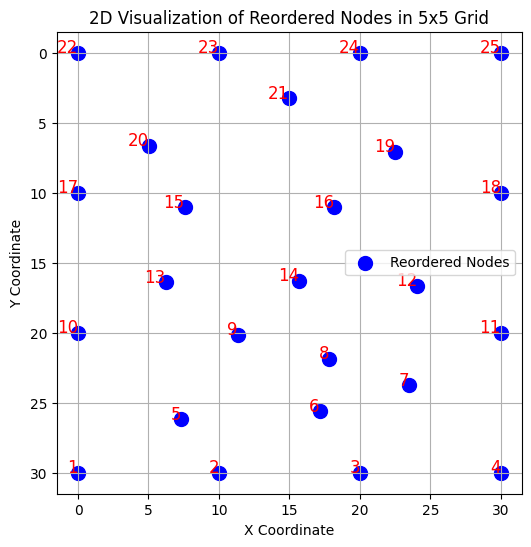

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import json

with open("nodexy.txt","r") as file:
    NodeOriginal=json.load(file)
    NodeOriginal=np.array(NodeOriginal)
FirstSample=NodeOriginal[1,:,:].squeeze()
print(FirstSample)
node_data = FirstSample

# Extract x, y, z coordinates
node_positions = node_data[:, :2]  # Extract (x, y)

# Sort by y (descending), then x (ascending) to create a structured 2D grid
sorted_indices = np.lexsort((node_positions[:, 0], -node_positions[:, 1]))  
sorted_nodes = node_data[sorted_indices]  # Now nodes are in row-major order

# Reshape into (grid_height, grid_width, 3)
grid_height, grid_width = 5, 5  # 5x5 grid
grid_data = sorted_nodes.reshape(grid_height, grid_width, 3)

print("2D Grid Data Shape:", grid_data.shape)  # Should print (5,5,3)
print(grid_data)  # Check ordered nodes

x_sorted = grid_data[:, :, 0].flatten()
y_sorted = grid_data[:, :, 1].flatten()

# Create a 2D scatter plot to visualize the 5x5 grid
plt.figure(figsize=(6, 6))
plt.scatter(x_sorted, y_sorted, c='blue', s=100, label="Reordered Nodes")

# Annotate points with their indices to check correctness
for i, (x, y) in enumerate(zip(x_sorted, y_sorted)):
    plt.text(x, y, str(i + 1), fontsize=12, ha='right', color='red')

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("2D Visualization of Reordered Nodes in 5x5 Grid")
plt.gca().invert_yaxis()  # Flip y-axis to match typical (0,0) top-left grid orientation
plt.legend()
plt.grid(True)
plt.show()